##**1. Định nghĩa vấn đề (Define Problem)**

**Mục tiêu kinh doanh (Business Understanding):**
Tiểu đường (diabetes) là một trong những bệnh mãn tính phổ biến, ảnh hưởng lớn đến sức khỏe cộng đồng. Việc dự đoán khả năng mắc bệnh dựa trên các chỉ số y tế giúp bác sĩ, chuyên gia y tế và bệnh nhân có kế hoạch can thiệp, theo dõi và phòng ngừa sớm.

**Mô tả dữ liệu (Dataset Description):**
Bộ dữ liệu ***Pima Indians Diabetes*** được thu thập từ phụ nữ người da đỏ Pima, tuổi từ 21 trở lên. Bộ dữ liệu gồm 768 mẫu, mỗi mẫu chứa thông tin y tế và nhân khẩu học.

**Đặc trưng (Input features):**

* Pregnancies: số lần mang thai
* Glucose: nồng độ glucose trong máu sau nghiệm pháp dung nạp đường (mg/dl)
* BloodPressure: huyết áp tâm trương (mm Hg)
* SkinThickness: độ dày nếp gấp da (mm)
* Insulin: nồng độ insulin trong huyết thanh (mu U/ml)
* BMI: chỉ số khối cơ thể (kg/m²)
* DiabetesPedigreeFunction: chỉ số phả hệ tiểu đường (yếu tố di truyền)
* Age: tuổi (năm)

**Kết quả (Output / Target variable):**

* Outcome: xác định người đó có mắc bệnh tiểu đường hay không (0 = Không bệnh, 1 = Bệnh).


##**2. Chuẩn bị vấn đề (Prepare Problem)**

###2.1 Khai báo thư viện (Load Libraries)

In [33]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### 2.2. Nạp dữ liệu (Load Dataset)

In [34]:
# Load dataset
data_path = "/content/drive/MyDrive/SGU/Năm 3 - SGU/Khai Phá Dữ Liệu/Homework/Tuần 4 (22 9 - 28 9)/pima-indians-diabetes/pima-indians-diabetes.csv"
data_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df_dataset = pd.read_csv(data_path, names = data_names, header=0)

## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [35]:
# shape
print(f'+ Shape: {df_dataset.shape}')
# types
print(f'+ Data Types: \n{df_dataset.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(df_dataset.head(5))
display.display(df_dataset.tail(5))
# info
df_dataset.info()

+ Shape: (767, 9)
+ Data Types: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
+ Contents: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1
766,1,93,70,31,0,30.4,0.315,23,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Nhận xét**:

* Dữ liệu có 8 tính chất (thuộc tính đầu vào) để phân lớp: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age.
* Các thuộc tính được đo bằng những đơn vị khác nhau (mg/dl, mm Hg, mm, kg/m², chỉ số phả hệ, số lần, tuổi).
* Tổng số dòng dữ liệu là 768 dòng.
* Dữ liệu để phân lớp nằm ở cột **Outcome** (0 = không mắc tiểu đường, 1 = mắc tiểu đường).


#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [36]:
# Kiểm tra tính toàn vẹn dữ liệu
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
n_duplicated = df_dataset.duplicated().sum()

print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])

print(f'+ Có giá trị NaN: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])

print(f'+ Số dòng trùng lặp: {n_duplicated}')
if n_duplicated > 0:
    display.display(df_dataset[df_dataset.duplicated()])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị NaN: False
+ Số dòng trùng lặp: 0


**Nhận xét**:
+ Dữ liệu không có giá trị rỗng (NaN, Null).
+ Dữ liệu không có dòng trùng lặp.

#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [37]:
description = df_dataset.describe().T
display.display(description)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,767.0,3.842243,3.370877,0.000,1.0000,3.000,6.000,17.00
Glucose,767.0,120.859192,31.978468,0.000,99.0000,117.000,140.000,199.00
BloodPressure,767.0,69.101695,19.368155,0.000,62.0000,72.000,80.000,122.00
SkinThickness,767.0,20.517601,15.954059,0.000,0.0000,23.000,32.000,99.00
Insulin,767.0,79.903520,115.283105,0.000,0.0000,32.000,127.500,846.00
BMI,767.0,31.990482,7.889091,0.000,27.3000,32.000,36.600,67.10
DiabetesPedigreeFunction,767.0,0.471674,0.331497,0.078,0.2435,0.371,0.625,2.42
Age,767.0,33.219035,11.752296,21.000,24.0000,29.000,41.000,81.00
Outcome,767.0,0.348110,0.476682,0.000,0.0000,0.000,1.000,1.00


**Nhận xét**:

Dữ liệu có 8 tính chất đầu vào, mỗi tính chất có đơn vị đo khác nhau (mg/dl, mmHg, mm, kg/m², số lần, tuổi, chỉ số phả hệ).

Các giá trị nằm trong những khoảng rất khác biệt:
- Pregnancies: 0 - 17 (số lần mang thai).
- Glucose: 0 - 199 (mg/dl).
- BloodPressure: 0 - 122 (mm Hg).
- SkinThickness: 0 - 99 (mm).
- Insulin: 0 - 846 (mu U/ml).
- BMI: 0 - 67.1 (kg/m²).
- DiabetesPedigreeFunction: 0.08 - 2.42 (chỉ số phả hệ).
- Age: 21 - 81 (năm).

#### (4) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [38]:
df_dataset["Outcome"].value_counts()

,count
Outcome,
0,500
1,267


**Nhận xét**:
+ 0: Không mắc tiểu đường → 500 mẫu
+ 1: Mắc tiểu đường → 268 mẫu

Dữ liệu có sự mất cân bằng nhẹ (imbalanced)

#### (5) **Mối tương quan giữa các tính chất (Correlations)**

Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.

Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả.

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$

Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn.

Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.

In [39]:
correlations = df_dataset.corr(method='pearson')
display.display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
Glucose,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
BloodPressure,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
SkinThickness,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
Insulin,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
BMI,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
DiabetesPedigreeFunction,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
Age,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
Outcome,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


**Nhận xét**:

* Các cặp tính chất có độ tương quan cao với biến mục tiêu `Outcome`:

  - (Glucose, Outcome) ≈ 0.49
  - (BMI, Outcome) ≈ 0.31
  - (Age, Outcome) ≈ 0.24
  - (DiabetesPedigreeFunction, Outcome) ≈ 0.17
  - (SkinThickness, BMI) ≈ 0.65
  - (Insulin, SkinThickness) ≈ 0.44



### 3.2. Hiển thị dữ liệu (Visualize Data)

#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

**Box and whisker plots**
+ https://www.simplypsychology.org/boxplots.html
+ So sánh các trung vị (median) tương ứng của mỗi ô hộp (box plot). Nếu đường trung vị của một ô hộp nằm bên ngoài ô của một ô hộp so sánh, thì có thể có sự khác biệt giữa hai nhóm.
+ So sánh chiều dài hộp để kiểm tra cách dữ liệu được phân tán giữa mỗi mẫu. Hộp càng dài thì dữ liệu càng phân tán. Dữ liệu càng nhỏ càng ít bị phân tán.
+ Một ngoại lệ (outlier) được định nghĩa là một điểm dữ liệu nằm bên ngoài phần rìa (whiskers) của ô hộp.
+ Kiểm tra hướng lệch của dữ liệu (cân đối, các phần tử tập trung trái, phải).
    + Median ở giữa hộp và râu (whiskers) ở hai bên như nhau thì phân bố là đối xứng.
    + Median ở gần đáy hộp hơn và nếu râu ngắn hơn ở đầu dưới của hộp, thì phân phối là lệch dương (lệch phải).
    + Median ở gần đầu hộp hơn và nếu râu ngắn hơn ở đầu trên của hộp, thì phân bố bị lệch âm (lệch trái).

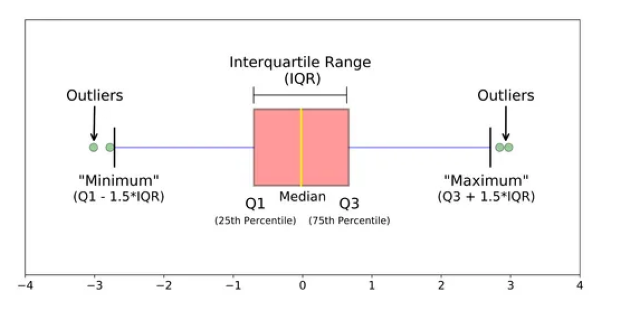

In [40]:
plt.figure(figsize=(8, 8)), plt.imshow(plt.imread("/content/drive/MyDrive/SGU/Năm 3 - SGU/Khai Phá Dữ Liệu/Homework/Tuần 4 (22 9 - 28 9)/eda_iris_classification/boxplots.png")), plt.axis("off"), plt.show();

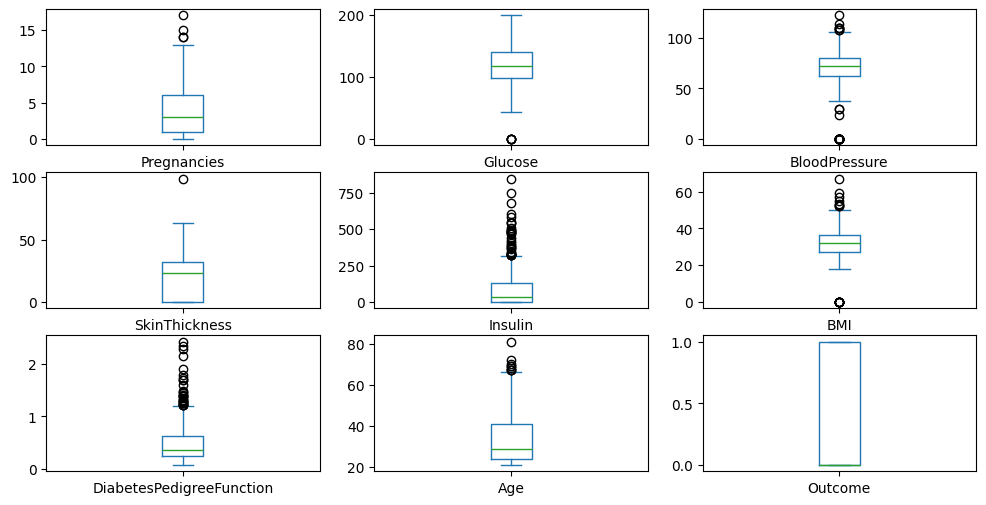

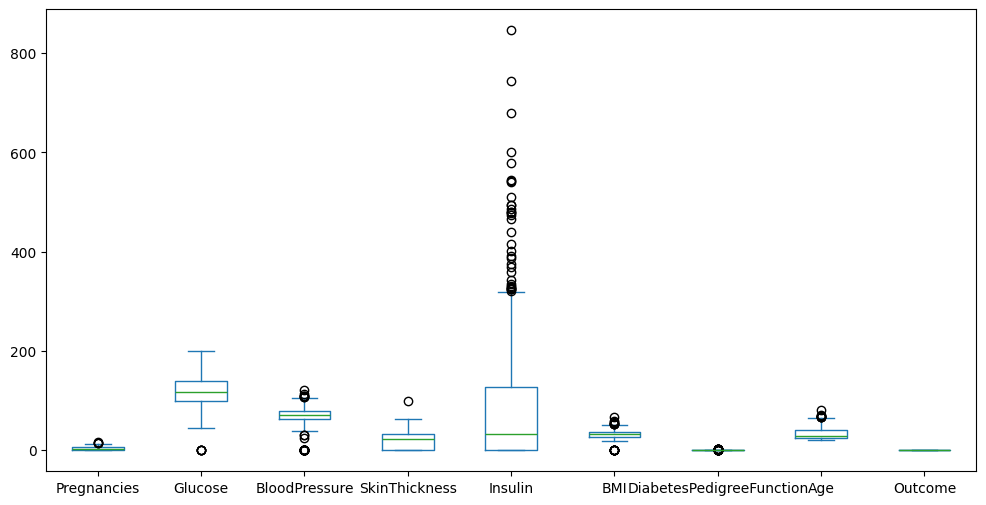

In [41]:
df_dataset.plot(kind="box", subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(12,6));
df_dataset.plot(kind="box", figsize=(12,6));

**Nhận xét**:
+ Độ trải rộng giữa các tính chất khá khác nhau (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age).

+ Phân bố của nhiều biến (Pregnancies, Insulin, Age, DiabetesPedigreeFunction, BMI) có xu hướng lệch phải (skew dương), thể hiện nhiều giá trị lớn bất thường.

+ Một số biến (Glucose, BloodPressure, SkinThickness, Insulin, BMI) xuất hiện nhiều giá trị bằng 0 không thực tế, có thể xem là giá trị thiếu (missing values).

+ Có khá nhiều outliers rõ rệt ở các biến Insulin, Pregnancies, Age và BMI.

+ Biến Glucose và BloodPressure có phân bố gần cân bằng hơn so với các thuộc tính khác.

**Biểu đồ Histogram**

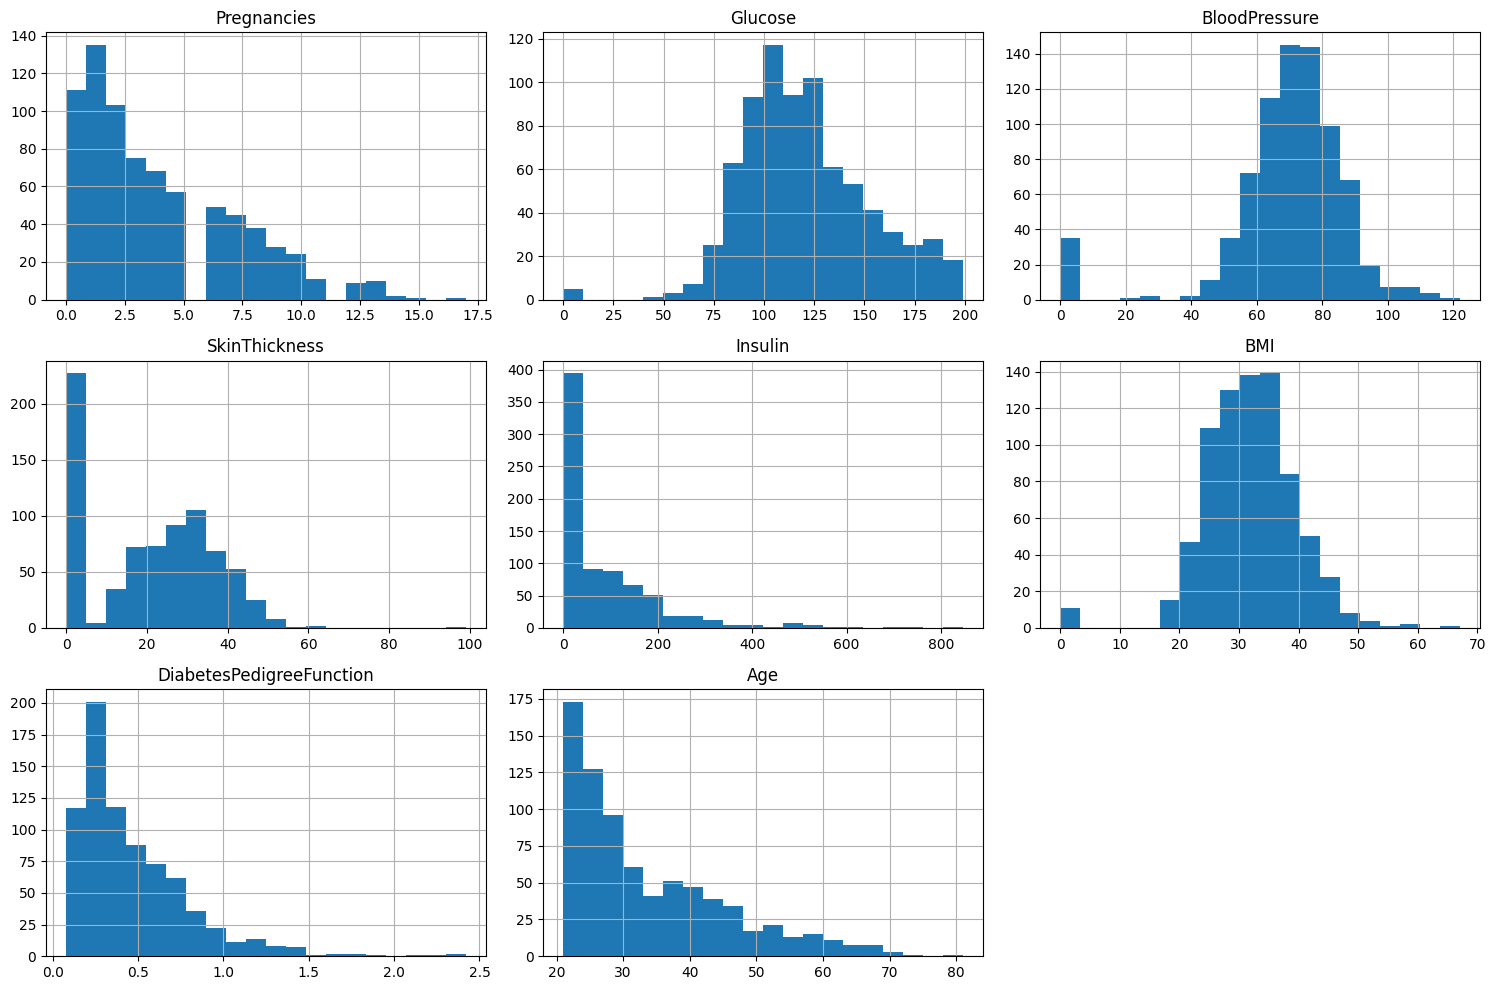

In [42]:
# Loại bỏ cột 'Outcome' vì nó là biến phân loại (0/1), không cần histogram
features = df_dataset.drop('Outcome', axis=1)
# Vẽ histogram cho tất cả các biến
features.hist(bins=20, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

#### (2) Hiển thị nhiều tính chất (Multivariate Plots)

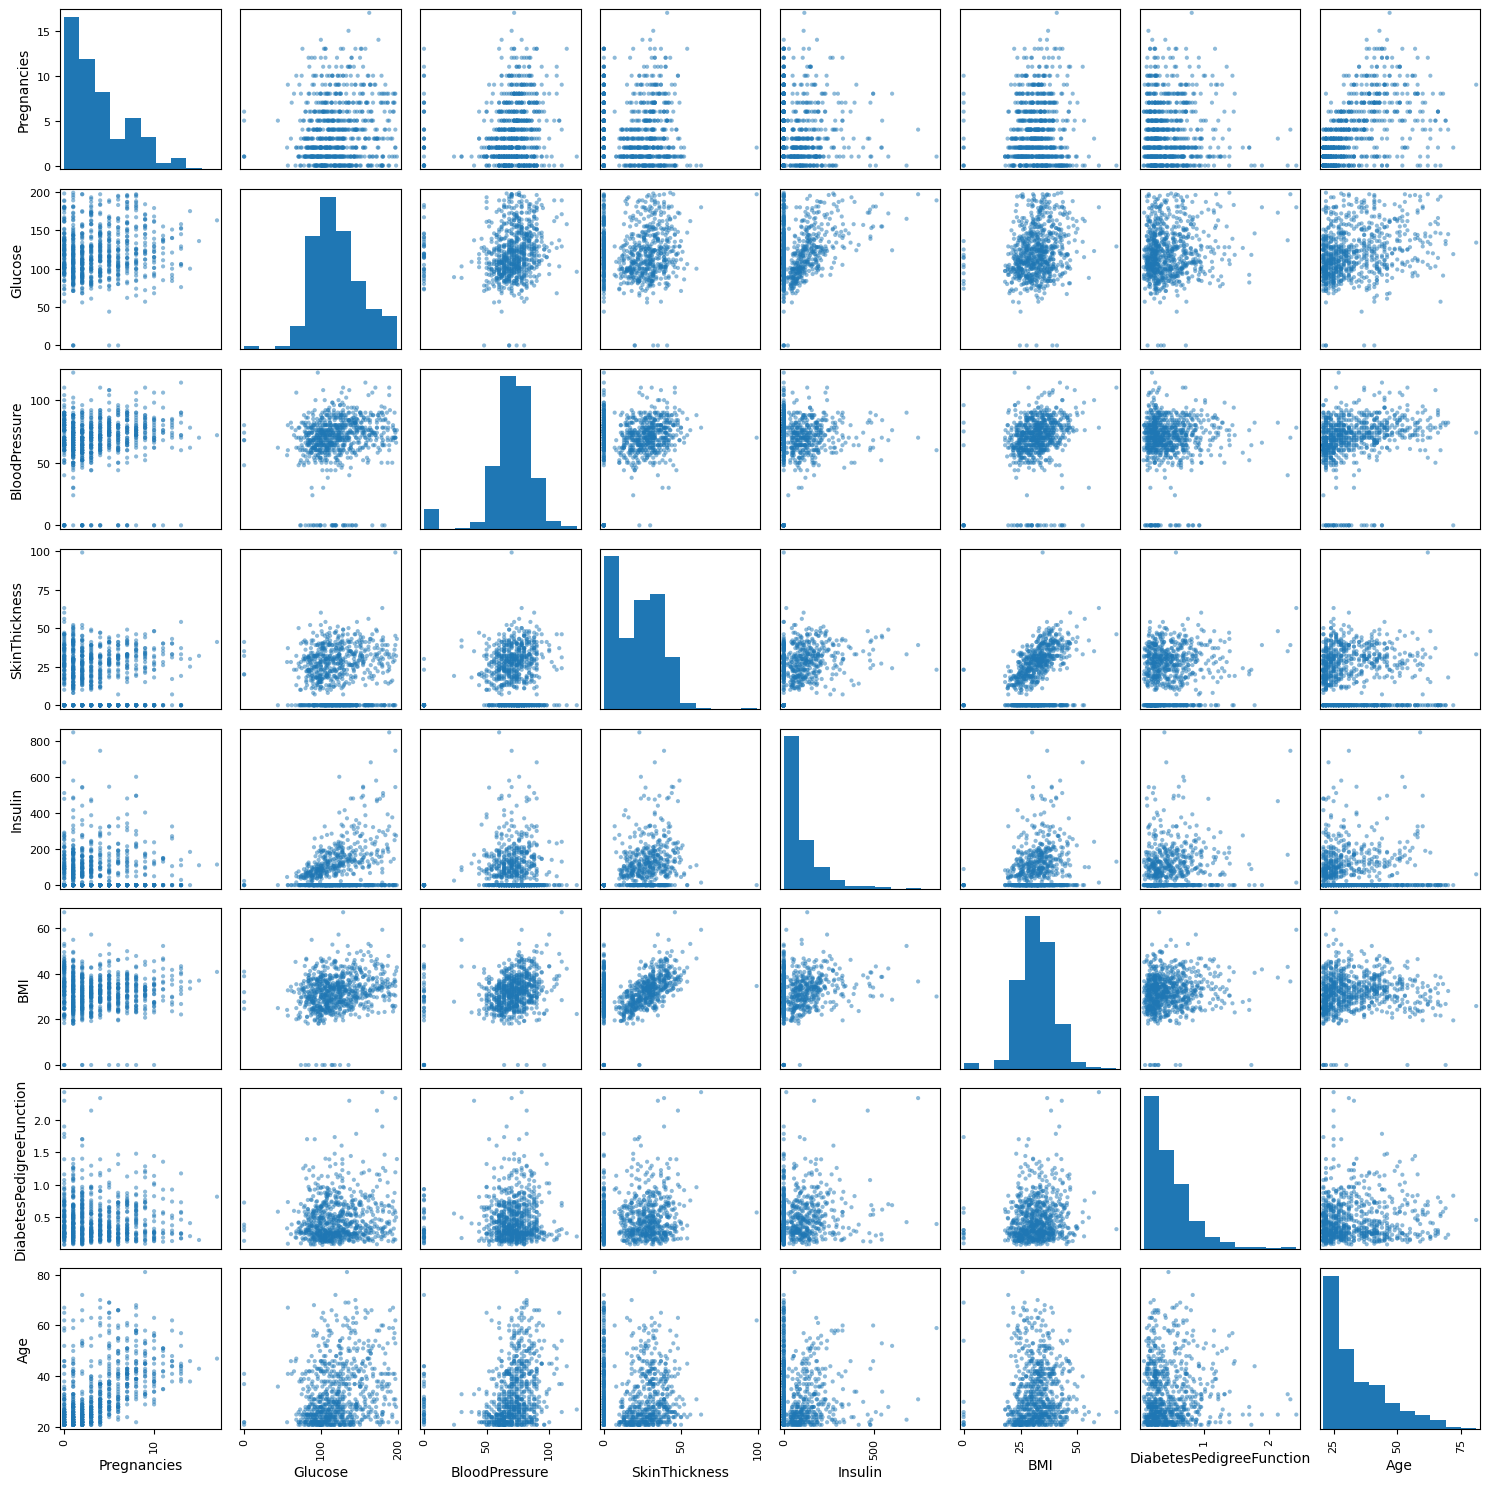

In [43]:
pd.plotting.scatter_matrix(features, figsize=(15, 15))
plt.tight_layout()
plt.show()

+ Các cặp tính chất có độ tương đồng cao:
    + (Pregnancies, Age) ≈ 0.54
    + (SkinThickness, BMI) ≈ 0.65
    + (SkinThickness, Insulin) = 0.43

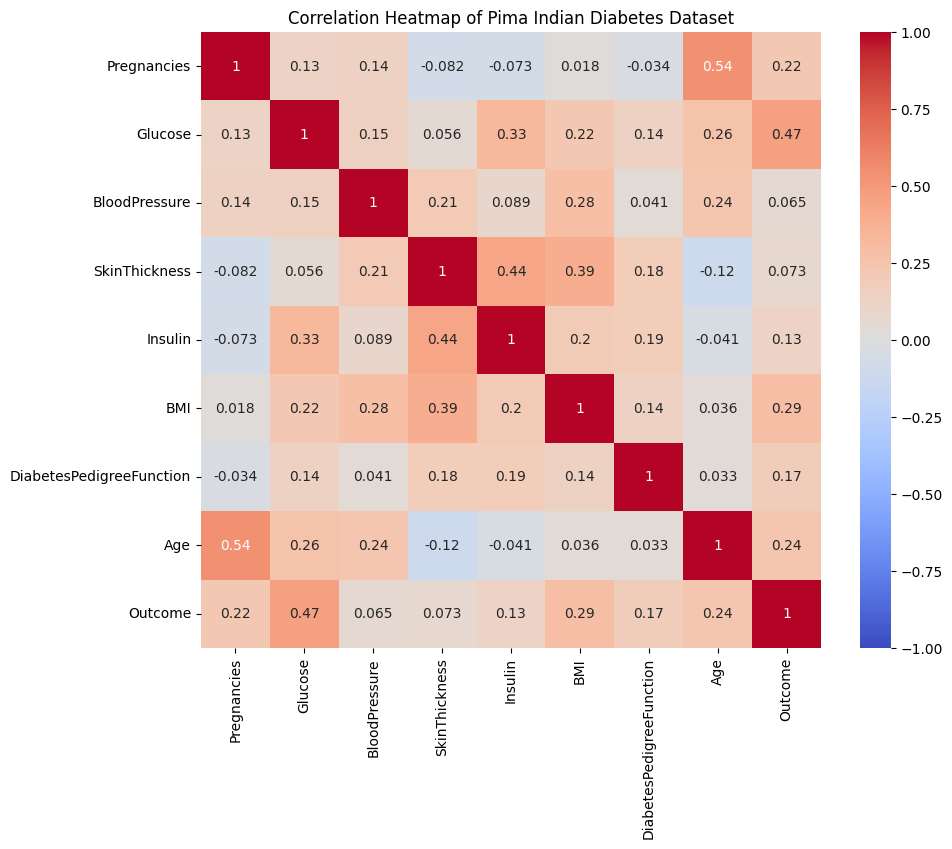

In [44]:
corr_matrix = df_dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Pima Indian Diabetes Dataset')
plt.show()

## 4. Chuẩn bị dữ liệu (Prepare Data)

### 4.1. Làm sạch dữ liệu (Data Cleaning)

#### (1) **Tạo bảng dữ liệu làm sạch**
+ Chỉ giữ lại các cột Input, Ouput

In [45]:
df_clean = df_dataset.copy()

#### (2) **Xóa dữ liệu trùng nhau**

In [46]:
display.display(df_dataset[df_dataset.duplicated()])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


#### (3) **Xử lý giá trị rỗng, không hợp lệ**

In [47]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])

+ Có giá trị Null: False
+ Có giá trị Nan: False


### 4.2. Biến đổi dữ liệu (Data Transforms)

#### (1) Chuyển đổi dữ liệu danh mục (Category) thành dữ liệu số

In [48]:
class_encoder = LabelEncoder()
class_encoder.fit(df_clean["Outcome"])
class_names = class_encoder.classes_
print(class_names)

[0 1]


#### (3) Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

In [49]:
scale_columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"
]

# Khởi tạo scaler
minmax_scaler = MinMaxScaler()

# Fit & transform
df_minmax = df_dataset.copy()
df_minmax[scale_columns] = minmax_scaler.fit_transform(df_dataset[scale_columns])

df_minmax.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0


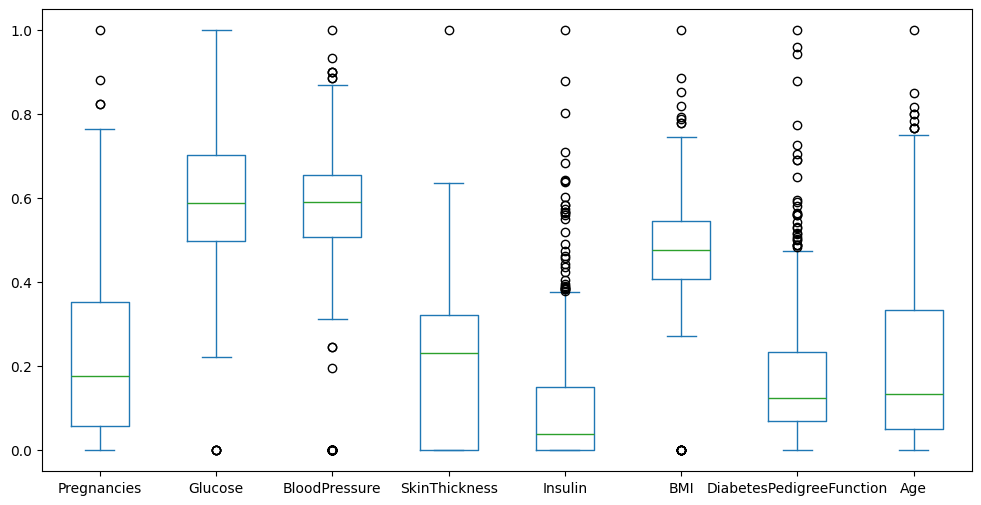

In [50]:
df_minmax[scale_columns].plot(kind="box", figsize=(12,6));

In [51]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])
df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.843726,-1.122086,-0.160249,0.532023,-0.693559,-0.683729,-0.364265,-0.188940,0
1,1.234240,1.944476,-0.263578,-1.286882,-0.693559,-1.102301,0.604701,-0.103795,1
2,-0.843726,-0.996920,-0.160249,0.155698,0.122357,-0.493469,-0.919684,-1.040393,0
3,-1.140579,0.505069,-1.503534,0.908349,0.764674,1.409132,5.482732,-0.018650,1
4,0.343683,-0.152051,0.253070,-1.286882,-0.693559,-0.810569,-0.817052,-0.274086,0
...,...,...,...,...,...,...,...,...,...
762,1.827945,-0.621423,0.356400,1.723720,0.868833,0.115363,-0.907610,2.535709,0
763,-0.546874,0.035698,0.046411,0.406582,-0.693559,0.610039,-0.397469,-0.529522,0
764,0.343683,0.004406,0.149740,0.155698,0.278596,-0.734465,-0.684235,-0.274086,0
765,-0.843726,0.160863,-0.470238,-1.286882,-0.693559,-0.239789,-0.370302,1.173384,1


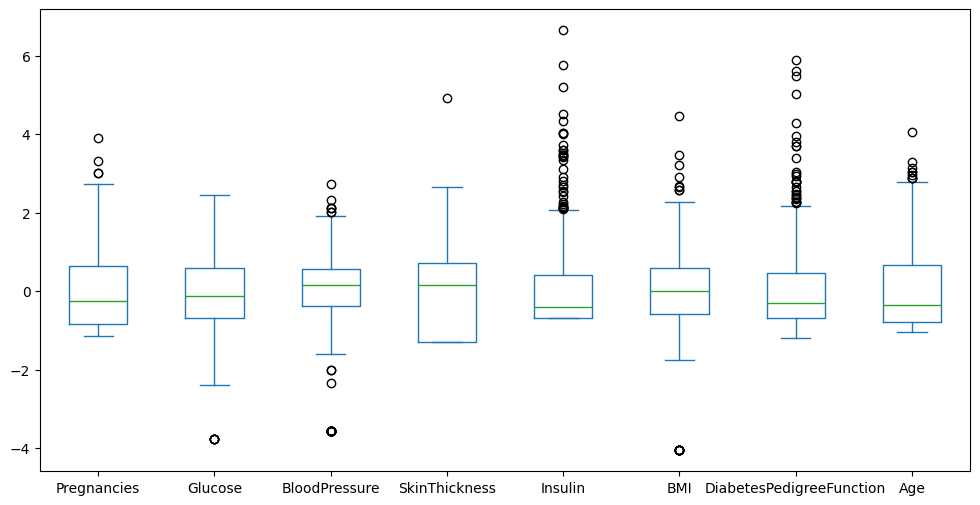

In [52]:
df_clean_standard[scale_columns].plot(kind="box", figsize=(12,6));

In [53]:
correlations = df_clean_standard.corr(method='pearson')
display.display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
Glucose,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
BloodPressure,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
SkinThickness,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
Insulin,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
BMI,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
DiabetesPedigreeFunction,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
Age,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
Outcome,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


#### (4) Chia dữ liệu thực nghiệm

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Chia dữ liệu thành tập train/test (tỷ lệ 70/30)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [54]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:, -1]
X_data.shape, y_data.shape
print(X_data[:20, :])
print(y_data[:20])

[[1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]
 [5.000e+00 1.160e+02 7.400e+01 0.000e+00 0.000e+00 2.560e+01 2.010e-01
  3.000e+01]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01]
 [1.000e+01 1.150e+02 0.000e+00 0.000e+00 0.000e+00 3.530e+01 1.340e-01
  2.900e+01]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01]
 [8.000e+00 1.250e+02 9.600e+01 0.000e+00 0.000e+00 0.000e+00 2.320e-01
  5.400e+01]
 [4.000e+00 1.100e+02 9.200e+01 0.000e+00 0.000e+00 3.760e+01 1.910e-01
  3.000e+01]
 [1.000e+01 1.680e+02 7.400e+01 0.000e+00 0.000e+00 3.800e+01 5.370e-01
  3.400e+01]
 [1.000e+01 1.390e+02 8.000e+01 0.000e+00 0.000e+00 2.710e+01 1.4

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7)
print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data)}')
print(f'+ Train: shape={X_train.shape}\nInput = \n{X_train[:5]}\nOutput = {y_train[:5]}')
print(f'+ Test: shape={X_test.shape}\nInput = \n{X_test[:5]}\nOutput = {y_test[:5]}')

+ Train/Test: Train Ratio = 0.6988265971316818
+ Train: shape=(536, 8)
Input = 
[[  7.     94.     64.     25.     79.     33.3     0.738  41.   ]
 [  2.     81.     60.     22.      0.     27.7     0.29   25.   ]
 [  9.    122.     56.      0.      0.     33.3     1.114  33.   ]
 [  3.    158.     76.     36.    245.     31.6     0.851  28.   ]
 [  7.    133.     84.      0.      0.     40.2     0.696  37.   ]]
Output = [0. 0. 1. 1. 0.]
+ Test: shape=(231, 8)
Input = 
[[  4.    132.     86.     31.      0.     28.      0.419  63.   ]
 [  2.     89.     90.     30.      0.     33.5     0.292  42.   ]
 [  6.    111.     64.     39.      0.     34.2     0.26   24.   ]
 [ 11.    143.     94.     33.    146.     36.6     0.254  51.   ]
 [  5.    104.     74.      0.      0.     28.8     0.153  48.   ]]
Output = [0. 0. 0. 1. 0.]


In [56]:
# Lưu thông tin
save_dir = "exps/iris"
if os.path.exists(save_dir) == False: os.makedirs(save_dir)

# Save training data
np.savez(f'{save_dir}/data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
# Save cleaning data
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)
# Save encoders
joblib.dump(class_encoder, f'{save_dir}/class_encoder.joblib')

os.listdir(save_dir)

['df_clean.xlsx', 'data.npz', 'class_encoder.joblib']

In [57]:
# Kiểm tra phục hồi dữ liệu
dict(np.load(f'{save_dir}/data.npz')).keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

In [58]:
pd.read_excel(f'{save_dir}/df_clean.xlsx')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [59]:
joblib.load(f'{save_dir}/class_encoder.joblib').classes_

array([0, 1])